# 🎓 College Event Feedback Analysis – Internship Project

## ✔ Step 1: Data loading + cleaning code

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Step 1.1 - Load the CSV
df = pd.read_csv(r"C:\Users\anubh\Downloads\Future_DS_03\Dataset\student_feedback.csv")

# Quick peek
print("Dataset shape:", df.shape)
df.head(8)

Dataset shape: (1001, 10)


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9
5,5,832,7,2,7,8,3,5,1,4
6,6,772,9,3,5,2,10,3,8,1
7,7,961,9,8,7,4,4,3,3,10


In [5]:
# Step 1.2 - Show original columns and a small sample to confirm structure
print("Columns:")
for i, c in enumerate(df.columns):
    print(i, "-", repr(c))

Columns:
0 - 'Unnamed: 0'
1 - 'Student ID'
2 - 'Well versed with the subject'
3 - 'Explains concepts in an understandable way'
4 - 'Use of presentations'
5 - 'Degree of difficulty of assignments'
6 - 'Solves doubts willingly'
7 - 'Structuring of the course'
8 - 'Provides support for students going above and beyond'
9 - 'Course recommendation based on relevance'


In [7]:
# Step 1.3 - Drop the column named 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)

# Show Columns name after removing first column
print("Columns:")
for i, c in enumerate(df.columns):
    print(i, "-", repr(c))

Columns:
0 - 'Student ID'
1 - 'Well versed with the subject'
2 - 'Explains concepts in an understandable way'
3 - 'Use of presentations'
4 - 'Degree of difficulty of assignments'
5 - 'Solves doubts willingly'
6 - 'Structuring of the course'
7 - 'Provides support for students going above and beyond'
8 - 'Course recommendation based on relevance'


In [9]:
# Step 1.4 - Quick dtype check
print(df.dtypes)

Student ID                                              int64
Well versed with the subject                            int64
Explains concepts in an understandable way              int64
Use of presentations                                    int64
Degree of difficulty of assignments                     int64
Solves doubts willingly                                 int64
Structuring of the course                               int64
Provides support for students going above and beyond    int64
Course recommendation based on relevance                int64
dtype: object


In [19]:
# Step 1.5 - Summary statistics of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Student ID,1001.0,500.000000,289.108111,0.0,250.0,500.0,750.0,1000.0
Well versed with the subject,1001.0,7.497502,1.692998,5.0,6.0,8.0,9.0,10.0
Explains concepts in an understandable way,1001.0,6.081918,2.597168,2.0,4.0,6.0,8.0,10.0
Use of presentations,1001.0,5.942058,1.415853,4.0,5.0,6.0,7.0,8.0
Degree of difficulty of assignments,1001.0,5.430569,2.869046,1.0,3.0,5.0,8.0,10.0
Solves doubts willingly,1001.0,5.474525,2.874648,1.0,3.0,6.0,8.0,10.0
Structuring of the course,1001.0,5.636364,2.920212,1.0,3.0,6.0,8.0,10.0
Provides support for students going above and beyond,1001.0,5.662338,2.891690,1.0,3.0,6.0,8.0,10.0
Course recommendation based on relevance,1001.0,5.598402,2.886617,1.0,3.0,6.0,8.0,10.0


## ✔ Step 2: Handling missing values

In [31]:
# Checking for NULL values
df.isna().sum()

Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

## ✔ Step 3: Renaming columns

In [34]:
# Step 3 - Rename columns to cleaner names

rename_map = {
    "Well versed with the subject": "subject_knowledge",
    "Explains concepts in an understandable way": "clear_explanation",
    "Use of presentations": "presentation_usage",
    "Degree of difficulty of assignments": "assignment_difficulty",
    "Solves doubts willingly": "doubt_solving",
    "Structuring of the course": "course_structure",
    "Provides support for students going above and beyond": "extra_support",
    "Course recommendation based on relevance": "course_recommendation"
}

df = df.rename(columns=rename_map)

print("Columns after renaming:")
df.columns

Columns after renaming:


Index(['Student ID', 'subject_knowledge', 'clear_explanation',
       'presentation_usage', 'assignment_difficulty', 'doubt_solving',
       'course_structure', 'extra_support', 'course_recommendation'],
      dtype='object')

## ✔ Step 4: Calculating average score per question

In [39]:
rating_cols_clean = [
    "subject_knowledge",
    "clear_explanation",
    "presentation_usage",
    "assignment_difficulty",
    "doubt_solving",
    "course_structure",
    "extra_support",
    "course_recommendation"
]

In [41]:
# Step 4.1 - Calculate average score per question
avg_scores = df[rating_cols_clean].mean().sort_values(ascending=False)

print("Average Score per Question (sorted):")
avg_scores

Average Score per Question (sorted):


subject_knowledge        7.497502
clear_explanation        6.081918
presentation_usage       5.942058
extra_support            5.662338
course_structure         5.636364
course_recommendation    5.598402
doubt_solving            5.474525
assignment_difficulty    5.430569
dtype: float64

In [43]:
# Step 4.2 - Create a clean summary DataFrame
avg_scores_df = pd.DataFrame({
    'Question': avg_scores.index,
    'Average Score (1-10)': avg_scores.values.round(2)
})

avg_scores_df

,Question,Average Score (1-10)
0,subject_knowledge,7.50
1,clear_explanation,6.08
2,presentation_usage,5.94
3,extra_support,5.66
4,course_structure,5.64
5,course_recommendation,5.60
6,doubt_solving,5.47
7,assignment_difficulty,5.43


In [45]:
# Step 4.3 - Compute overall satisfaction score
overall_satisfaction = df[rating_cols_clean].mean(axis=1).mean()

print(f"Overall Satisfaction Score (out of 10): {overall_satisfaction:.2f}")

Overall Satisfaction Score (out of 10): 5.92


## ✔ Step 5: Calculating Satisfaction Score per Student

In [48]:
# Step 5.1 - Per-student satisfaction score (mean across all questions)
df["student_satisfaction"] = df[rating_cols_clean].mean(axis=1).round(2)

df[["Student ID", "student_satisfaction"]].head()

,Student ID,student_satisfaction
0,340,5.00
1,253,4.88
2,680,4.38
3,806,5.88
4,632,7.50


In [50]:
# Step 5.2 - Summary of student satisfaction
df["student_satisfaction"].describe()

count    1001.000000
mean        5.915285
std         0.894741
min         3.380000
25%         5.250000
50%         5.880000
75%         6.620000
max         8.250000
Name: student_satisfaction, dtype: float64

In [56]:
# 5.3 — To check if any student has extreme values
df.sort_values("student_satisfaction").head(5)  # lowest 5

,Student ID,subject_knowledge,clear_explanation,presentation_usage,assignment_difficulty,doubt_solving,course_structure,extra_support,course_recommendation,student_satisfaction
644,281,5,6,6,3,4,1,1,1,3.38
592,54,7,2,5,1,5,3,1,3,3.38
743,724,5,2,6,1,7,3,3,1,3.50
285,450,5,2,6,2,4,5,1,4,3.62
612,73,7,2,5,6,3,1,1,4,3.62


In [58]:
df.sort_values("student_satisfaction", ascending=False).head(5)   # highest 5

,Student ID,subject_knowledge,clear_explanation,presentation_usage,assignment_difficulty,doubt_solving,course_structure,extra_support,course_recommendation,student_satisfaction
199,770,10,10,5,7,10,7,7,10,8.25
110,188,7,6,8,9,9,8,9,10,8.25
692,238,8,7,5,10,10,9,7,10,8.25
103,671,9,8,6,10,10,7,7,8,8.12
658,269,9,10,6,10,10,1,9,10,8.12


## ✔ Step 6: Correlation matrix

In [79]:
# Step 6: Correlation Matrix
corr_matrix = df[rating_cols_clean].corr()

corr_matrix

,subject_knowledge,clear_explanation,presentation_usage,assignment_difficulty,doubt_solving,course_structure,extra_support,course_recommendation
subject_knowledge,1.000000,0.008916,-0.024674,-0.007087,-0.056981,-0.027490,0.031488,-0.015143
clear_explanation,0.008916,1.000000,-0.012305,0.029484,-0.025839,0.012766,-0.003237,0.008528
presentation_usage,-0.024674,-0.012305,1.000000,0.020918,-0.036972,-0.020097,-0.014798,0.023173
assignment_difficulty,-0.007087,0.029484,0.020918,1.000000,0.009637,-0.053624,-0.002949,-0.005181
doubt_solving,-0.056981,-0.025839,-0.036972,0.009637,1.000000,0.036062,0.006543,-0.000511
course_structure,-0.027490,0.012766,-0.020097,-0.053624,0.036062,1.000000,-0.027819,-0.010224
extra_support,0.031488,-0.003237,-0.014798,-0.002949,0.006543,-0.027819,1.000000,-0.031117
course_recommendation,-0.015143,0.008528,0.023173,-0.005181,-0.000511,-0.010224,-0.031117,1.000000


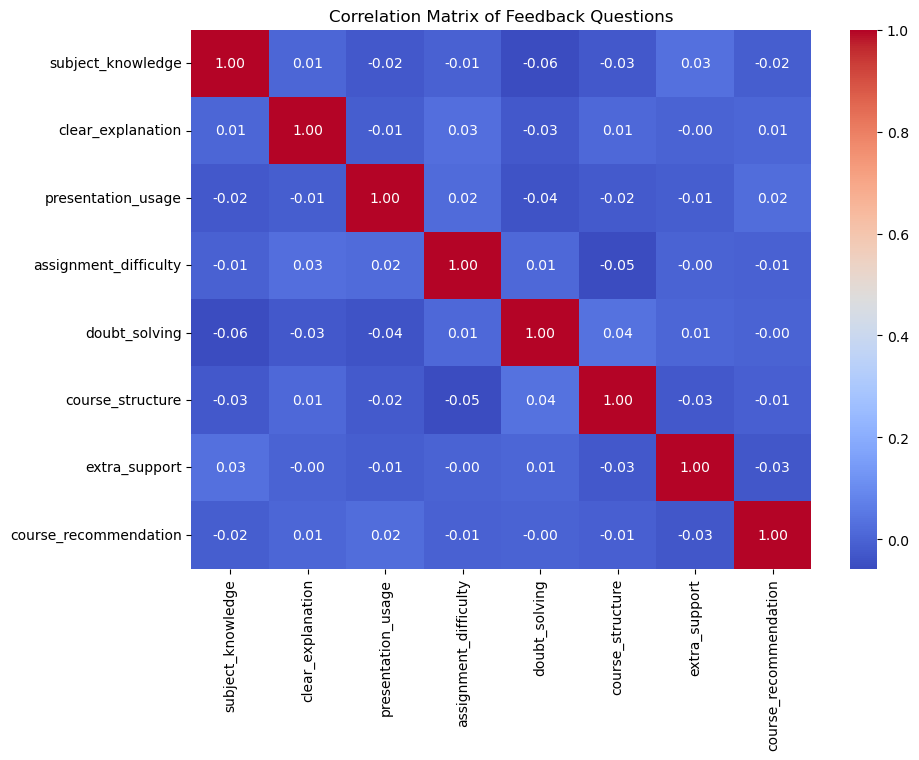

In [76]:
# Correlation Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Feedback Questions")
plt.show()

## ✔ Step 7: Visualizations

C:\Users\anubh\AppData\Local\Temp\ipykernel_19584\2113952516.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")


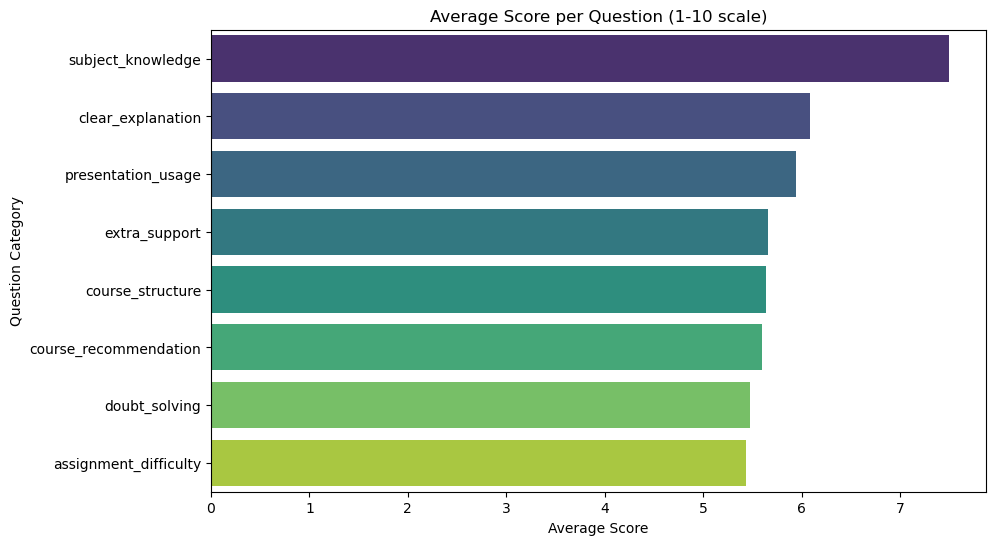

In [82]:
# Step 7.1 — Bar chart of average scores
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1: Average rating per question
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")

plt.title("Average Score per Question (1-10 scale)")
plt.xlabel("Average Score")
plt.ylabel("Question Category")
plt.show()

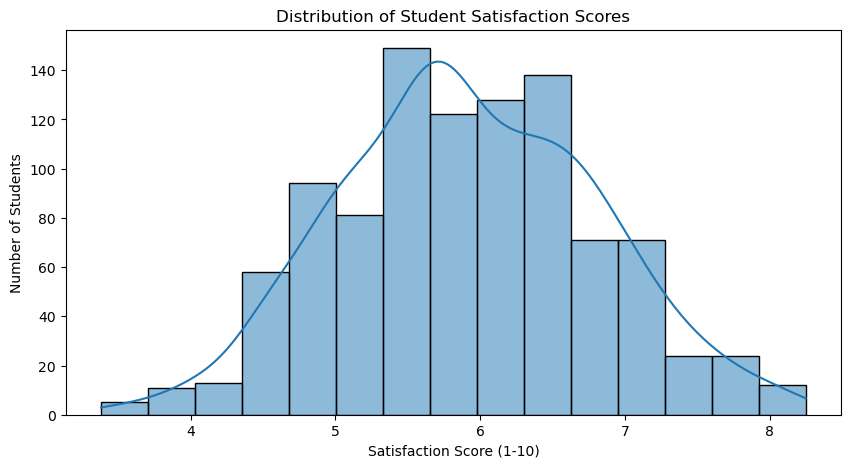

In [84]:
# Step 7.2 — Plot student satisfaction distribution (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(df["student_satisfaction"], bins=15, kde=True)

plt.title("Distribution of Student Satisfaction Scores")
plt.xlabel("Satisfaction Score (1-10)")
plt.ylabel("Number of Students")
plt.show()

In [86]:
# Step 7.3 - Identify Strengths & Weaknesses

# Sort averages again just to be safe
sorted_avg = avg_scores.sort_values(ascending=False)

# Top 3 strengths
top_3 = sorted_avg.head(3)
print("Top 3 Strengths:",top_3)

# Bottom 3 weaknesses
bottom_3 = sorted_avg.tail(3)
print("Top 3 Weakness:", bottom_3)

Top 3 Strengths: subject_knowledge     7.497502
clear_explanation     6.081918
presentation_usage    5.942058
dtype: float64
Top 3 Weakness: course_recommendation    5.598402
doubt_solving            5.474525
assignment_difficulty    5.430569
dtype: float64
